In [3]:
import pickle
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from stop_words import get_stop_words
import Stemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import linear_model as lm
from sklearn import ensemble
from sklearn import metrics
from sklearn.decomposition import RandomizedPCA
from sklearn.manifold import TSNE
import xgboost as xgb 
from gensim import corpora, models
from segtok import segmenter
from sklearn import svm
import config
%matplotlib inline

In [4]:
def read_posts(domain):
    filename = 'data/{}.pkl'.format(domain)
    with open(filename, 'rb') as f:
        posts = pickle.load(f)
    return posts


def generate_dataset(posts):
    texts = [post['text'] for post in posts]
    likes = [post['likes'] for post in posts]
    return texts, likes


def clear_texts(texts, with_stemmer=True):
    clear_texts = []
    stop_words = get_stop_words('ru')
    stemmer = Stemmer.Stemmer('russian')

    for text in texts:
        text = text.lower()
        text = re.sub('[^а-яё]', ' ', text)
        text = text.split()
        text = [t for t in text if t not in stop_words]
        if with_stemmer:
            text = stemmer.stemWords(text)
        clear_texts.append(' '.join(text))
    return clear_texts


def plot_date_likes(posts):
    fig, ax = plt.subplots()

    years = YearLocator()   # every year
    months = MonthLocator()  # every month
    yearsFmt = DateFormatter('%Y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)

    ax.set_xlabel('Year')
    ax.set_ylabel('Likes')
    ax.set_title('Horror stories')

    ax.plot_date([datetime.fromtimestamp(p['date']) for p in posts],
                 [p['likes'] for p in posts])

In [22]:
posts = read_posts(config.DOMAINS[4])

In [23]:
len(posts)

7544

In [8]:
%matplotlib qt

In [32]:
plot_date_likes(posts)

In [30]:
likes = np.array([post['likes'] for post in posts])

In [31]:
likes.mean(), np.median(likes)

(55.698568398727467, 44.0)

In [39]:
print(posts[likes.argsort()[-2]]['text'])

Ужасный отдых

Я расскажу историю, которую рассказал мне мой друг. Через пару дней после того как я услышал от него этот ужасный рассказ, моего друга нашли в его квартире мертвым, он висел под потолком на огромном крюке, а под ним лужа крови. Итак, я буду рассказывать от его лица. 

Мы с друзьями собрались на пару дней выехать на природу. Взяли мясо на шашлыки, ну и конечно же выпить. Для такой поездки мы приобрели на прокат три трейлера. А видел бы ты место на котором мы должны были провести два дня. Рядом речка, лес, слышно пение птиц, а самое главное никакой городской суеты. В первый день нашего приезда было пасмурно, мы быстро пожарили шашлычки и уселись на полянке возле реки. Нас было пятеро. Антоха, его девушка Ленка, Серега вместе с Катькой и я. И вот такой компанией мы выпивали и обсуждали планы насчет нашего отдыха. Вдруг пошел сильный дождь. Мы похватали пожитки и бросились по трейлерам.
Дождь не стихал. Начало вечереть. Я сидел у окна своего трейлера и смотрел на лес, он был

In [39]:
print(posts[likes.argsort()[-2]]['text'])

Ужасный отдых

Я расскажу историю, которую рассказал мне мой друг. Через пару дней после того как я услышал от него этот ужасный рассказ, моего друга нашли в его квартире мертвым, он висел под потолком на огромном крюке, а под ним лужа крови. Итак, я буду рассказывать от его лица. 

Мы с друзьями собрались на пару дней выехать на природу. Взяли мясо на шашлыки, ну и конечно же выпить. Для такой поездки мы приобрели на прокат три трейлера. А видел бы ты место на котором мы должны были провести два дня. Рядом речка, лес, слышно пение птиц, а самое главное никакой городской суеты. В первый день нашего приезда было пасмурно, мы быстро пожарили шашлычки и уселись на полянке возле реки. Нас было пятеро. Антоха, его девушка Ленка, Серега вместе с Катькой и я. И вот такой компанией мы выпивали и обсуждали планы насчет нашего отдыха. Вдруг пошел сильный дождь. Мы похватали пожитки и бросились по трейлерам.
Дождь не стихал. Начало вечереть. Я сидел у окна своего трейлера и смотрел на лес, он был

In [27]:
posts[-1000]

{'date': 1468602338,
 'likes': 45,
 'reposts': 2,
 'text': 'Статуэтка \n \nМой отец привез из Африки, куда он ездил на командировку, отвратительную статуэтку. Уж не знаю, откуда он достал эту гадость — должно быть, продали прямо на улице как «сувенирчик». Статуэтка была покрыта бурыми пятнами и отвратительно пахла. Фигурка была сделана из странного дерева, которое легко было разбить, и представляла собой худого, странного человека; как я поняла, это был старик с впавшими глазами, тонкими конечностями и выступающими ребрами. Он стоял на пьедестале, на котором были выцарапаны какие-то письмена. Немного поиска в Интернете, я узнала, что на языке страны, которую посещал отец, это значит «третий». Будто назло, мой отец поставил ее в моей комнате. Мой разум, и без того переполненный подсознательными страхами и ужасающими образами из-за множества просмотренных фильмов ужасов, перенёс плохо присутствие жутковатого «третьего» в моей комнате. Сон, и без того беспокойный, покинул меня почти совсе

In [4]:
%%time
texts, labels = generate_dataset(posts)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.97 ms


In [50]:
cleared_texts = clear_texts(texts, True)

In [5]:
texts_train, texts_test, y_train, y_test = train_test_split(cleared_texts, labels, train_size=0.7,
                                                            random_state=100)

In [6]:
%%time
vect = CountVectorizer(analyzer='word', max_features=1000, ngram_range=(1, 3))
X_train = vect.fit_transform(texts_train)
X_test = vect.transform(texts_test)

CPU times: user 48.9 s, sys: 532 ms, total: 49.4 s
Wall time: 49.4 s


In [6]:
%%time
vect = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train = vect.fit_transform(texts_train)
X_test = vect.transform(texts_test)

CPU times: user 15.5 s, sys: 120 ms, total: 15.6 s
Wall time: 15.6 s


In [12]:
vocab = vect.get_feature_names()
dist = np.sum(X_train.toarray(), axis=0)

In [13]:
vocab_dist = dict(zip(vocab, dist))

In [15]:
sorted(vocab_dist.items(), key=lambda i: -i[1])

[('дом', 228.15573907652495),
 ('двер', 202.20392151732494),
 ('мо', 165.53322677922765),
 ('комнат', 154.34772310840222),
 ('мам', 148.42900203754647),
 ('ноч', 143.99358674864939),
 ('глаз', 138.86330478613715),
 ('рук', 136.61618924384146),
 ('квартир', 134.7563335146807),
 ('стал', 120.72300650069022),
 ('девушк', 118.87161009497937),
 ('друг', 113.94899653143672),
 ('окн', 110.41244264176622),
 ('нача', 110.32417037813134),
 ('бабушк', 109.09451226786938),
 ('свет', 108.95669904991377),
 ('реш', 107.22258321182083),
 ('голов', 106.78225878611131),
 ('одн', 105.23893724575996),
 ('мест', 103.14885321401233),
 ('девочк', 101.557578221127),
 ('увидел', 100.9740160758832),
 ('лиц', 99.130295853369631),
 ('женщин', 97.2052084647313),
 ('как', 94.050078309991321),
 ('стоя', 93.169414491325881),
 ('стран', 90.910748079371274),
 ('час', 89.389589879164078),
 ('родител', 89.369097976652114),
 ('истор', 88.435774248261467),
 ('так', 88.321130694418429),
 ('ног', 84.354771917659932),
 ('стра

In [7]:
params = {gbtree
    'objective': 'reg:linear',
    'booster': 'gbtree',
    'eval_matrics': 'mae'
}

In [8]:
%%time
dtrain = xgb.DMatrix(X_train, y_train)
dvalid = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

gbm = xgb.train(params, dtrain, 500, watchlist, verbose_eval=True, early_stopping_rounds=30)

Will train until eval error hasn't decreased in 30 rounds.
[0]	train-rmse:809.056641	eval-rmse:806.787048
[1]	train-rmse:645.735046	eval-rmse:651.350464
[2]	train-rmse:543.108032	eval-rmse:557.125610
[3]	train-rmse:479.836456	eval-rmse:501.517792
[4]	train-rmse:444.550446	eval-rmse:472.303070
[5]	train-rmse:421.229309	eval-rmse:456.227325
[6]	train-rmse:408.330780	eval-rmse:446.811615
[7]	train-rmse:398.288055	eval-rmse:441.258667
[8]	train-rmse:392.464630	eval-rmse:438.257507
[9]	train-rmse:386.449371	eval-rmse:435.907135
[10]	train-rmse:382.251160	eval-rmse:434.221527
[11]	train-rmse:375.638947	eval-rmse:432.321472
[12]	train-rmse:372.015259	eval-rmse:431.717926
[13]	train-rmse:367.238342	eval-rmse:430.874359
[14]	train-rmse:364.774109	eval-rmse:430.127441
[15]	train-rmse:362.840332	eval-rmse:429.231598
[16]	train-rmse:359.978058	eval-rmse:428.961243
[17]	train-rmse:356.680908	eval-rmse:427.783539
[18]	train-rmse:354.901733	eval-rmse:426.859131
[19]	train-rmse:352.518860	eval-rmse:42

CPU times: user 1min 59s, sys: 44 ms, total: 1min 59s
Wall time: 32.6 s


[124]	train-rmse:250.965317	eval-rmse:413.041260
Stopping. Best iteration:
[94]	train-rmse:264.532776	eval-rmse:412.457733



In [9]:
pred = gbm.predict(dvalid)

In [45]:
list(filter(lambda x: x[1] == 215, vect.vocabulary_.items()))

[('ваш', 215)]

In [28]:
sorted(gbm.get_fscore().items(), key=lambda x: x[1])

[('f505', 1),
 ('f1043', 1),
 ('f894', 1),
 ('f1729', 1),
 ('f860', 1),
 ('f2269', 1),
 ('f836', 1),
 ('f3711', 1),
 ('f4791', 1),
 ('f3948', 1),
 ('f929', 1),
 ('f1839', 1),
 ('f4282', 1),
 ('f2404', 1),
 ('f2397', 1),
 ('f4010', 1),
 ('f68', 1),
 ('f4028', 1),
 ('f3099', 1),
 ('f56', 1),
 ('f3916', 1),
 ('f417', 1),
 ('f4774', 1),
 ('f3183', 1),
 ('f2027', 1),
 ('f4125', 1),
 ('f4007', 1),
 ('f1563', 1),
 ('f2146', 1),
 ('f2777', 1),
 ('f4584', 1),
 ('f3087', 1),
 ('f4720', 1),
 ('f3558', 1),
 ('f2990', 1),
 ('f151', 1),
 ('f1800', 1),
 ('f2067', 1),
 ('f26', 1),
 ('f4014', 1),
 ('f4000', 1),
 ('f4491', 1),
 ('f587', 1),
 ('f1758', 1),
 ('f2901', 1),
 ('f3812', 1),
 ('f2868', 1),
 ('f3032', 1),
 ('f1219', 1),
 ('f1321', 1),
 ('f809', 1),
 ('f3386', 1),
 ('f2800', 1),
 ('f3693', 1),
 ('f2379', 1),
 ('f63', 1),
 ('f2577', 1),
 ('f2967', 1),
 ('f1479', 1),
 ('f3594', 1),
 ('f3078', 1),
 ('f597', 1),
 ('f4215', 1),
 ('f4798', 1),
 ('f1654', 1),
 ('f3237', 1),
 ('f3961', 1),
 ('f4851', 1)

In [123]:
pca = RandomizedPCA(5000)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 27.9 µs


In [124]:
%%time
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

CPU times: user 28min 11s, sys: 2min 47s, total: 30min 58s
Wall time: 8min 45s


In [34]:
%%time
lr = lm.LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
metrics.mean_absolute_error(y_test, pred)  # 984.92221230322502

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
%%time
lr = lm.Ridge(100)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
metrics.mean_absolute_error(y_test, pred)  # 301.92221230322502
lr.coef_.max()  # 82

CPU times: user 3.65 s, sys: 0 ns, total: 3.65 s
Wall time: 3.65 s


In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
y_train_sc = scaler.fit_transform(y_train)
y_test_sc = scaler.transform(y_test)

/home/digitman/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/digitman/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/digitman/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1)

In [16]:
%%time
lr = lm.Ridge(2)
lr.fit(X_train, y_train)
pred = lr.predict(X_test) # 331 for pca 2, 305 for pca 1000, 313 for only 1000 vect, 285 for td-idf 1000
                          # 279 for tf-idf 10000, 285 tf-idf 4000, 282 tf-idf 5000, 281.9 xgb tf-idf 500

CPU times: user 264 ms, sys: 0 ns, total: 264 ms
Wall time: 260 ms


In [30]:
%%time
sr = svm.SVR()
sr.fit(X_train, y_train)
pred = sr.predict(X_test)

TypeError: __init__() got an unexpected keyword argument 'С'

In [17]:
lr.coef_.max()

907.581568710184

In [18]:
lr.coef_.argsort()

array([1411, 4236,  174, ...,  904,  226, 3302])

In [23]:
vect.get_feature_names()[904]

'должн'

In [27]:
metrics.mean_absolute_error(y_test, pred)  # 301.92221230322502

331.53519925472625

In [43]:
%%time
lr = lm.Ridge(100)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

CPU times: user 3.91 s, sys: 4 ms, total: 3.91 s
Wall time: 3.91 s


In [44]:
metrics.mean_absolute_error(y_test, pred)  # 301.92221230322502

297.12415651522571

In [138]:
from sklearn import neighbors

In [144]:
%%time
nr = neighbors.KNeighborsRegressor(neighbors=20)
nr.fit(X_train, y_train)
pred = nr.predict(X_test)

/home/digitman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Passing additional arguments to the metric function as **kwargs is deprecated and will no longer be supported in 0.18. Use metric_params instead.
  if __name__ == '__main__':


CPU times: user 6.82 s, sys: 80 ms, total: 6.9 s
Wall time: 6.9 s


In [145]:
metrics.mean_absolute_error(y_test, pred)  # 286.92221230322502

322.21114071203675

In [8]:
%%time
rf = ensemble.RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
metrics.mean_absolute_error(y_test, pred)  # 286.92221230322502

CPU times: user 2min 57s, sys: 20 ms, total: 2min 57s
Wall time: 2min 57s


In [71]:
%%time
rf = ensemble.RandomForestRegressor(n_jobs=-1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

CPU times: user 6min 41s, sys: 344 ms, total: 6min 41s
Wall time: 2min 3s


In [72]:
metrics.mean_absolute_error(y_test, pred)  # 301.92221230322502

284.12197543894411

In [39]:
rf.feature_importances_.argsort()[-5:]

array([ 223, 1782,   27, 2138, 1547])

In [43]:
rf.feature_importances_.max()

0.012933535325396673

In [42]:
vect.get_feature_names()[2138]

'написать'

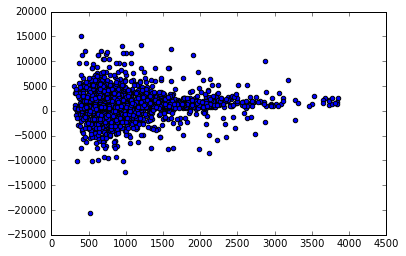

In [43]:
plt.scatter(y_test, pred)

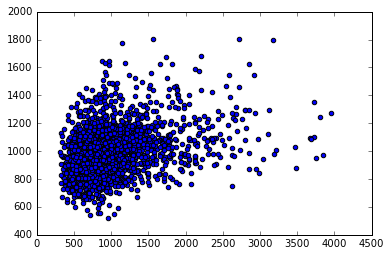

In [33]:
plt.scatter(y_test, pred)

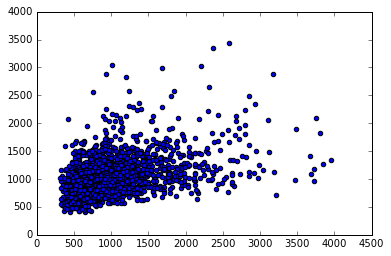

In [96]:
plt.scatter(y_test, pred)

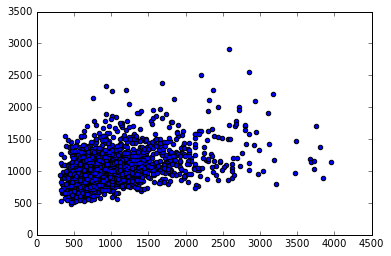

In [39]:
plt.scatter(y_test, pred)

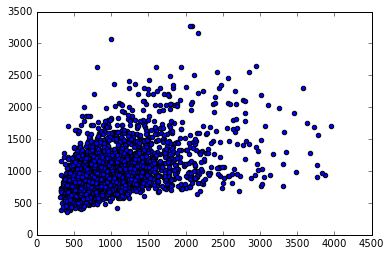

In [73]:
plt.scatter(y_test, pred)

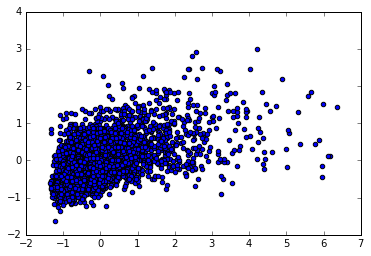

In [85]:
plt.scatter(y_test_sc, pred)

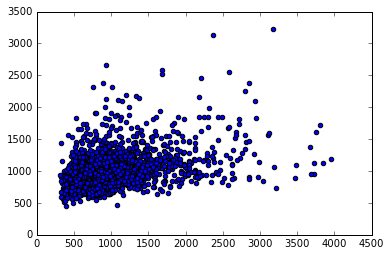

In [93]:
plt.scatter(y_test, pred)

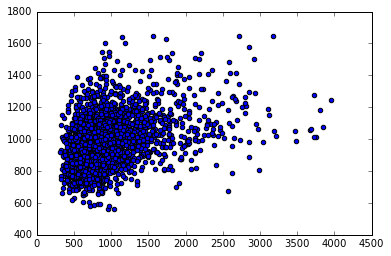

In [90]:
plt.scatter(y_test, pred)

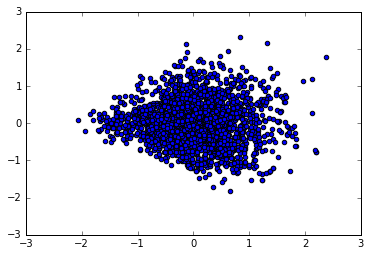

In [49]:
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1])

In [51]:
splited_texts = [text.split() for text in cleared_texts]

In [52]:
dictionary2 = corpora.Dictionary(splited_texts)
corpus2 = [dictionary2.doc2bow(text) for text in splited_texts]

In [53]:
%time ldamodel = models.ldamulticore.LdaMulticore(corpus, id2word=dictionary, num_topics=30, passes=1)

NameError: name 'corpus' is not defined

In [68]:
for i, topic in ldamodel.show_topics(num_topics=30, num_words=10, formatted=False):
    print("Topic " + str(i) + ': ')
    for word, p in topic:
        print(word, p)

Topic 0: 
зерка 0.00866911787819
свет 0.00568136097039
рук 0.00482915421849
глаз 0.00478876817838
ван 0.00435646351804
двер 0.004292067608
мо 0.00419788894739
комнат 0.00409406278613
дом 0.00403207930349
отражен 0.00358317449826
Topic 1: 
мо 0.0112945497385
ноч 0.0109439240522
квартир 0.00957578374654
вс 0.00953742233142
комнат 0.00935715707871
глаз 0.00647855730371
стал 0.00591869389799
дом 0.00490805946968
стен 0.00487519625538
кроват 0.00464895881677
Topic 2: 
вагон 0.00699717872183
поезд 0.00596247901417
вс 0.00570608630943
двер 0.00510439864355
рук 0.00443689631742
л 0.00436563932645
макс 0.00424768291721
глаз 0.00419512565658
свет 0.00393617748268
ноч 0.00372345505606
Topic 3: 
джефф 0.00785239505288
двер 0.00451121551722
глаз 0.00446377303965
ноч 0.00438455874967
вод 0.00422688561844
вс 0.00412023625629
ещ 0.00404329277891
дом 0.00376038486322
рук 0.00327233816505
хасум 0.0032481027828
Topic 4: 
дом 0.0079135588937
мо 0.00702635102528
мам 0.0062438376169
истор 0.00380304795556
р

In [71]:
perplexity = ldamodel.log_perplexity(list(corpus))
print(2**(-perplexity))

343.260764583


In [90]:
ldamodel.get_document_topics(list(corpus)[2])

[(14, 0.89396109394515089),
 (21, 0.035501786982948536),
 (24, 0.041606310274277511),
 (25, 0.025744534287815757)]

In [75]:
for l in list(corpus)[1]:
    print(dictionary[int(l[0])])

смерт
рассказа
сдела
могл
ночн
умерл
открыт
ушл
холодн
голов
станов
отпуст
необходим
небольш
работа
голос
окн
мысл
смен
сред
истор
чита
молитв
нача
ноч
начина
жил
комнат
продолжа
двер
жив
дом
повтор
мо
замеча
пыта
нашл
утр
муж
живет
реш
словарн
заворот
д
посла
репутац
бабк
пришел
курс
нагнул
предстоя
хрипет
облож
служ
кажд
ним
брос
вспомн
насмотревш
появ
пункт
чертовщин
поддержа
окон
темнеет
шум
ох
гробик
соседн
ше
зерка
капл
долг
холод
гроб
предлож
украин
успоко
норов
верх
лбу
хрен
дупл
прихват
лежа
либ
деньг
прыгнул
церкв
страща
пошл
сосед
соверш
зажег
родственник
передвижен
маха
размашист
мест
затащ
сумерк
отпеван
возвращен
вдов
вер
сопровожден
прав
ошалевш
закр
останов
матер
проем
посмотр
приеха
пропада
ожидан
сумк
представл
сердобольн
тихоньк
видн
степ
сугроб
категорическ
смутн
печ
план
люб
причин
подозрева
никола
наедин
прост
опереж
ракэл
изда
подальш
происход
придет
дорожн
испуст
везт
давненьк
справля
дава
прилож
скучн
писател
мужик
валенк
дал
звук
спин
одинок
телег
маразматичк


In [91]:
print(texts[14])

Некромант
Автор: Дмитрий Стаин
Посвящается памяти Михаила Горшенева 

…так кто ж ты, наконец? 
- Я – часть той силы, 
что вечно хочет зла,
и вечно совершает благо. 
Гете. «Фауст»

Каково быть изгоем? Паршиво. Тебя мешают с грязью окружающие, а близкие отрекаются. Сидя в темнице, я смотрю в окно, где багрово-красная луна опускается за горизонт. Она так скоро стремится оставить меня наедине с темнотой, откуда мои внутренние демоны будут выносить обвинительные приговоры перед завтрашней смертной казнью. Почему она не даст мне ответ на все вопросы: за что меня ненавидят? Для чего я вообще родился? 
Об этом размышлял юноша, ожидающий казни. 
— Так что же ты не так сделал? Почему народ ненавидит тебя? – Спрашивает голос, звучащий в темноте. Каждая минута проведенная здесь лишь приближала безумие. спрашивает кто-то из темноты. Видимо рассудок парня уже дал сдвиг. 

Десять лет назад. 

— Прости парень, но твоя сестра умерла. Тело привезут на кладбище ближе к полудню, - ответил чумной доктор, в

In [92]:
topic = ldamodel.show_topic(14, 20)
for word, p in topic:
    print(word, p)

двер 0.00730618722832
дом 0.00611828970262
рук 0.00556625776357
девушк 0.0054033567607
нача 0.00512078280651
глаз 0.00509672143148
голос 0.00477139875
реш 0.00400655983502
окн 0.00378959677146
лиц 0.00378689801188
друг 0.0035697940053
комнат 0.00327324345219
одн 0.00298401777794
ног 0.00297447405622
ответ 0.00297277932247
машин 0.00270838086153
мест 0.0025559520721
паш 0.0025098482556
увидел 0.00250231040857
ноч 0.00249514846038


## Cutted Model

In [114]:
print(dictionary2)

Dictionary(58491 unique tokens: ['отсрочен', 'крепл', 'нетривиальн', 'моментальн', 'общегородск']...)


In [93]:
import copy
dictionary2 = copy.deepcopy(dictionary)

In [55]:
filtered_tokens = [token for token, count in dictionary2.dfs.items() if count > 8 and count < 3000\
                   and len(dictionary2.id2token[token]) > 2]
len(filtered_tokens)

18298

In [56]:
for token in filtered_tokens[:10]:
    print(dictionary2.id2token[token])

атмосфер
главн
счастлив
полюбова
ускоря
вагон
подбежа
доск
люб
кажд


In [57]:
dictionary2.filter_tokens(good_ids=filtered_tokens)

In [58]:
len(dictionary2)

18298

In [59]:
corpus2 = [dictionary2.doc2bow(text) for text in splited_texts]

In [136]:
corpus_size_before = sum([word[1] for document in corpus for word in document])
corpus_size_after = sum([word[1] for document in corpus2 for word in document])
corpus_size_before, corpus_size_after

(5844094, 3260027)

In [19]:
corpus_size_after = sum([word[1] for document in corpus2 for word in document])
corpus_size_after

2726654

In [60]:
%time ldamodel2 = models.ldamulticore.LdaMulticore(corpus2, id2word=dictionary2, num_topics=50, passes=30)

CPU times: user 42min 32s, sys: 55min 50s, total: 1h 38min 23s
Wall time: 57min 4s


In [61]:
ldamodel2.save('lda_cutted')

In [21]:
for i, topic in ldamodel2.show_topics(num_topics=50, num_words=5, formatted=False):
    print("Topic " + str(i) + ': ')
    for word, p in topic:
        print(word, p)

Topic 0: 
мальчик 0.093194307167
влад 0.00671869307704
игра 0.00661788849378
карт 0.00636373579059
учительниц 0.00520634353085
Topic 1: 
андр 0.0366385273152
даш 0.0194690040006
андре 0.0078698414952
голос 0.00527553278133
квартир 0.00520694306245
Topic 2: 
нин 0.0108176769348
вик 0.0101421997817
лес 0.0068513515497
диск 0.00479380043305
гриш 0.00456518905441
Topic 3: 
мам 0.0401937642027
пап 0.00995427924332
бабушк 0.00973897512806
родител 0.00837712420175
кроват 0.00784318369198
Topic 4: 
тел 0.00513170118719
словн 0.00399630729318
кров 0.00324872565621
стен 0.00310218001842
страх 0.00301223086507
Topic 5: 
муж 0.00933971313077
подруг 0.00778373055291
жен 0.00693224145496
люб 0.00594057613139
месяц 0.00451967191603
Topic 6: 
книг 0.0074113859537
класс 0.00574905926465
школ 0.00560586125379
работ 0.00401823079942
нов 0.00312917462739
Topic 7: 
серг 0.00580987850164
женщин 0.00431877063273
алл 0.00360906097561
кошк 0.00321409335858
работ 0.00303102457535
Topic 8: 
бол 0.00733682688402


In [123]:
perplexity2 = ldamodel2.log_perplexity(list(corpus2))
print(2**(-perplexity2))

358.332368682


In [38]:
ldamodel2.get_document_topics(list(corpus2)[5], minimum_probability=0.05)  # 994 666

[(2, 0.075625441365832435),
 (4, 0.23931026362082178),
 (5, 0.085726964863954008),
 (11, 0.11246386637616576),
 (13, 0.05942900899595583),
 (20, 0.1399308376058496),
 (23, 0.12787711736382279)]

In [62]:
def get_corpus_matrix(model, corpus):
    matrix = np.zeros((len(corpus), model.num_topics))
    for i in range(len(corpus)):
        doc_topics = model.get_document_topics(list(corpus)[i], minimum_probability=0.05)
        for topic_id, prob in doc_topics:
            matrix[i, topic_id] = prob
    return matrix

In [63]:
%time matrix = get_corpus_matrix(ldamodel2, corpus2)

CPU times: user 1min 31s, sys: 2min 55s, total: 4min 26s
Wall time: 1min 10s


In [59]:
x_train, x_test, y_train, y_test = train_test_split(matrix, labels, train_size=0.7,
                                                            random_state=100)

In [60]:
%%time
lr = lm.Ridge(2)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

CPU times: user 8 ms, sys: 64 ms, total: 72 ms
Wall time: 42.7 ms


In [36]:
%%time
lr = ensemble.RandomForestRegressor(100, n_jobs=-1)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

CPU times: user 4min 57s, sys: 164 ms, total: 4min 57s
Wall time: 1min 23s


In [37]:
metrics.mean_absolute_error(y_test, pred)  # 301.92221230322502

326.45741449523001

In [63]:
from sklearn.manifold import t_sne

In [ ]:
tsne = t_sne.TSNE()
points = tsne.fit_transform(matrix)

In [75]:
for l in list(corpus)[1]:
    print(dictionary[int(l[0])])

смерт
рассказа
сдела
могл
ночн
умерл
открыт
ушл
холодн
голов
станов
отпуст
необходим
небольш
работа
голос
окн
мысл
смен
сред
истор
чита
молитв
нача
ноч
начина
жил
комнат
продолжа
двер
жив
дом
повтор
мо
замеча
пыта
нашл
утр
муж
живет
реш
словарн
заворот
д
посла
репутац
бабк
пришел
курс
нагнул
предстоя
хрипет
облож
служ
кажд
ним
брос
вспомн
насмотревш
появ
пункт
чертовщин
поддержа
окон
темнеет
шум
ох
гробик
соседн
ше
зерка
капл
долг
холод
гроб
предлож
украин
успоко
норов
верх
лбу
хрен
дупл
прихват
лежа
либ
деньг
прыгнул
церкв
страща
пошл
сосед
соверш
зажег
родственник
передвижен
маха
размашист
мест
затащ
сумерк
отпеван
возвращен
вдов
вер
сопровожден
прав
ошалевш
закр
останов
матер
проем
посмотр
приеха
пропада
ожидан
сумк
представл
сердобольн
тихоньк
видн
степ
сугроб
категорическ
смутн
печ
план
люб
причин
подозрева
никола
наедин
прост
опереж
ракэл
изда
подальш
происход
придет
дорожн
испуст
везт
давненьк
справля
дава
прилож
скучн
писател
мужик
валенк
дал
звук
спин
одинок
телег
маразматичк


In [25]:
print(texts[994])

Ночь на кухне

В августе 2008 года к нам приехали погостить на пару недель родственники. Приехали всей своей многочисленной семьей, и мне пришлось, как гостеприимной хозяйке, уступить свою комнату и перебраться спать на диван в столовой. Столовую с кухней мы строили сами, когда купили дом — сначала вместо кухни там был длинный коридор с чуланом. Честно сказать, ходить по этому коридору было жутковато, и было много странных случаев, связанным с ним, но сейчас речь не о них. Когда мы сносили этот чулан, то в стенах нашли разные предметы, которые, мягко говоря, смущали. Особенно привлек мое внимание большой крест, больше ладони — он был воткнут между досками за стеной. Там, где должны были быть ноги Спасителя, он был прожжен и перекручен. При строительстве мы все это выбросили. И дом стал, казалось, более светлым и приятным для проживания.

Дни мы проводили с родственниками, а по ночам я отдыхала на диванчике в столовой. Первые три ночи не было ничего странного. На четвертую ночь я, как в

In [26]:
posts[994]['likes']

668

In [27]:
topic = ldamodel2.show_topic(3, 20)
for word, p in topic:
    print(word, p)

мам 0.0401937642027
пап 0.00995427924332
бабушк 0.00973897512806
родител 0.00837712420175
кроват 0.00784318369198
сестр 0.00764184273661
спат 0.0070334734769
кухн 0.00685227421845
квартир 0.00648673070906
отец 0.00595501868896
проснул 0.00563302035217
спал 0.00449666892846
пошл 0.00441331235482
брат 0.00415037840205
могл 0.00414080214294
смотр 0.00410322305853
муж 0.0039772760578
рассказа 0.00388013749621
сем 0.00387682784773
мат 0.00376116305982


## Cutted Model 2

In [95]:
print(dictionary)

Dictionary(56938 unique tokens: ['излечива', 'захлопнув', 'дума', 'баблишк', 'лемм']...)


In [158]:
import copy
dictionary3 = copy.deepcopy(dictionary)

In [172]:
filtered_tokens = [token for token, count in dictionary3.dfs.items() if count > 10 and count < 1000\
                   and len(dictionary.id2token[token]) > 2]
len(filtered_tokens)

20925

In [173]:
for token in filtered_tokens[:100]:
    print(dictionary.id2token[token])

хозяйк
ремонт
задума
снят
съеха
ссср
квартирк
грудн
республик
клетк
област
отпуст
косметическ
необходим
тонк
отдельн
утомлен
дочер
мебел
устраива
крикнут
сжима
молитв
чьи
убра
шепч
объят
списа
городк
сладк
теря
заж
ночник
тяжест
легч
бывш
двухкомнатн
рыб
шелест
живет
прилег
заворот
посла
репутац
курс
нагнул
предстоя
хрипет
облож
служ
насмотревш
пункт
чертовщин
поддержа
окон
темнеет
гробик
капл
гроб
украин
норов
верх
лбу
хрен
дупл
прихват
прыгнул
церкв
страща
соверш
зажег
передвижен
маха
размашист
затащ
сумерк
отпеван
возвращен
вдов
сопровожден
ошалевш
проем
пропада
ожидан
сумк
представл
сердобольн
тихоньк
степ
сугроб
категорическ
смутн
печ
план
подозрева
никола
наедин
опереж
изда
подальш


## word2vec

In [27]:
texts[34]

'Существо в яме\n\nСлучилось это, когда я ещё студентом был. Нас всегда осенью на картошку засылали, колхозам помогать. Было весело, все расселялись по домикам одиноких старушек, днём работали, а вечером костры, гитары, водочка — в общем, весёлая студенческая жизнь.\n\nНо однажды довелось нам повстречаться с чем-то неопознанным.\n\nУтро выдалось сухое, дождя не было уже две недели, грибники деревенские всё жаловались, что этот год у них голодным выйдет. Мы собрались в поля. Как обычно, одели спортивные костюмы, вооружились лопатами — и вперёд. До обеда копали, было жарко, нам местные бабки молоко носили в кувшинах, мы с жадностью его пили. Естественно, захотелось по нужде потом. И мы решили углубиться за стогами сена, на опушку леса вдали, чтобы девчонки наши не ругались потом. Пошло нас пятеро парней, заодно и перекурить, да планы строить, за кем ухаживать будем.\n\nЗашли за стога, обошли кучу камней и увидели резкую глубокую поросшую яму. Долго не думая, с сигаретами в зубах стали сп

In [31]:
list(segmenter.split_multi(texts[34]))

['Адский дом',
 'После школы я и моя подруга Саша пошли в заброшенную девятиэтажку, где никто не живет уже с 2001 года.',
 'Опишу дом: 9 этажей, серый цвет, ширина дома около 500 метров, и на всю эту ширину всего лишь один подъезд. И представьте себе какие там длинные коридоры!',
 'Зашли мы в дом и начали бродить, искать приключения на свои "больные" головы. Ходили на этажах. Ничего интересного не нашли.',
 'Решили мы уже уже уходить, как вдруг в конце длинного коридора я увидела лифт. Мы подошли. Он явно был сломан,но когда мы нажали на вызов, оказалось, что он рабочий. Ладно, решили прокатиться. Зашли мы в лифт, поехали на 9 этаж. Едем, едем....лифт открывается и мы оказываемся на 6 этаже, хотя вызывали на девятый. С этого 6 этажа очень сильно воняло! Мы опять нажали на 9. Опять приехали на 6 этаж. Вся кабинка уже провоняла и мы не могли терпеть этот запах. Пришлось нам выйти. Как только мы вышли из лифта, он провалился вниз! Я сняла шапку, приложила его к носу.',
 'Теперь мы поняли 

In [5]:
def clear_sentences(texts, with_stemmer=False):
    cleared_sentences = []
    stop_words = get_stop_words('ru')
    stemmer = Stemmer.Stemmer('russian')

    for text in texts:
        sentences = segmenter.split_multi(text)
        for sentence in sentences:
            sentence = sentence.lower()
            sentence = re.sub('[^а-яё]', ' ', sentence)
            cleared_sentences.append(sentence.split()) 
    return cleared_sentences

In [6]:
%time clear_sent = clear_sentences(texts)

CPU times: user 1min 19s, sys: 216 ms, total: 1min 19s
Wall time: 1min 19s


In [7]:
from gensim.models import word2vec

In [10]:
%time model = word2vec.Word2Vec(clear_sent, size=100)

CPU times: user 1min 42s, sys: 380 ms, total: 1min 42s
Wall time: 41.1 s


In [8]:
model = word2vec.Word2Vec.load('./horror_word2vec')

In [12]:
model.init_sims(replace=True)

In [73]:
model.save('horror_word2vec')

In [33]:
model.most_similar('мясо')

[('лучшее', 0.5764118432998657),
 ('блюдо', 0.570827841758728),
 ('воображение', 0.5555707216262817),
 ('красивое', 0.5549602508544922),
 ('одиночество', 0.5544384121894836),
 ('волокна', 0.5540045499801636),
 ('старинные', 0.5530262589454651),
 ('чудище', 0.5508273243904114),
 ('прочее', 0.5490062236785889),
 ('круги', 0.5480929613113403)]

In [41]:
model.most_similar(positive=['пиво', 'водка'])

[('жарить', 0.8167783617973328),
 ('пьем', 0.8068792223930359),
 ('мангал', 0.805904746055603),
 ('пожарили', 0.8052377700805664),
 ('вино', 0.7879600524902344),
 ('шашлыки', 0.7869458198547363),
 ('шашлык', 0.7859614491462708),
 ('разлили', 0.7829737663269043),
 ('поели', 0.7783637046813965),
 ('распивали', 0.7775405049324036)]

In [18]:
def get_vector_from_words(words, model, num_features):
    features = np.zeros((num_features,), dtype=np.float32)
    n = 0
    index2word = set(model.index2word)
    
    for word in words:
        if word in index2word:
            features += model[word]
            n += 1
    return features / n

In [25]:
def get_texts_vectors(texts, model, num_features):
    texts_vectors = np.zeros((len(texts), num_features), dtype=np.float32)
    
    i = 0
    for text in texts:
        texts_vectors[i] = get_vector_from_words(text.split(), model, num_features)
        i += 1
    return texts_vectors

In [26]:
cleared_texts = clear_texts(texts, False)

In [27]:
%time texts_vectors = get_texts_vectors(cleared_texts, model, 300)

CPU times: user 1min 8s, sys: 28 ms, total: 1min 8s
Wall time: 1min 8s


In [30]:
x_train, x_test, y_train, y_test = train_test_split(texts_vectors, labels, train_size=0.7,
                                                            random_state=100)

In [31]:
%%time
lr = lm.Ridge(2)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

CPU times: user 92 ms, sys: 76 ms, total: 168 ms
Wall time: 87.7 ms


In [43]:
%%time
lr = ensemble.GradientBoostingRegressor(n_estimators=500)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

CPU times: user 1min 23s, sys: 4 ms, total: 1min 23s
Wall time: 1min 23s


In [44]:
metrics.mean_absolute_error(y_test, pred)  # 301.92221230322502

322.14110224569413

In [10]:
m = np.array([[1, 2]])

In [42]:
weights = []
for word in  model.vocab:
    weights.append(model[word])

In [43]:
weights = weights[:100]

In [44]:
from sklearn.manifold import t_sne

In [ ]:
tsne = t_sne.TSNE(2)
points = tsne.fit_transform(weights)

In [46]:
pca = RandomizedPCA(2)
X_traint_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

## Stacking LDA and word2vec

In [66]:
text_vectors = np.array(texts_vectors)

In [67]:
matrix.shape, text_vectors.shape

((7801, 50), (7801, 300))

In [69]:
stack = np.hstack((matrix, text_vectors))

In [73]:
stack.shape

(7801, 350)

In [74]:
x_train, x_test, y_train, y_test = train_test_split(stack, labels, train_size=0.7,
                                                            random_state=100)

In [87]:
%%time
lr = lm.Ridge(10)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

CPU times: user 88 ms, sys: 32 ms, total: 120 ms
Wall time: 50 ms


In [88]:
lr.coef_.max()

254.64371331682014

In [94]:
%%time
lr = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=6)
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

CPU times: user 3min 16s, sys: 1.4 s, total: 3min 18s
Wall time: 3min 18s


In [95]:
metrics.mean_absolute_error(y_test, pred)  # 301.92221230322502

326.16593149328486